# EDA 

Steps for EDA
1. Data collection
2. Data Cleaning
3. Univeriate Analysis
4. Biveriate Analysis
5. Multiveriate Analysis

## Data collection:

Identify the data sources and gather the data. 
Check the data format and structure.
Ensure that data is complete and accurate.

## Data cleaning:

Identify and handle missing values. 
Remove duplicates values. 
impute missing values. 
Handle outliers. 
Transform data if necessary.
Check for data integrity. 

## Univeriate Analysis:

Calculate summary statistics such as mean, median, mode and standard deviation.
Find outliers.
Identify any patterns and annomillies in the data.
create histogram , box plot or other visualizations to understand the distribution of the data.

## Biveriate Analysis:

Identify relationships between variables.
calculate corelation between variables.
Create scatter plot or other visualizations to understand the relationships between variables.


## Multiveriate Analysis:

identify the relationship between multiple variables.
use techniques such as regression analysis or clustering to identify patterns and relationships between multiple variables.

## Visulaizations:

Create visualizations to gain insights and communicate findings effectively.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Import data

In [28]:
df = pd.read_excel(r"C:\Users\nabeel.zafar\Downloads\COUNTERBASED_4G_AVAILABILITY_REPORT.xlsx")
df.head()

,VENDOR,FRAGMENT_DATE,SITE,NO_OF_CELLS,MBU,RBU,MKT_REGION,CELL_AVAILABILITY_NUM,CELL_AVAILABILITY_DEN,CELL_AVAILABILITY
0,HUW,2024-11-03,AAL2252,6,N3-GLT-04,North,N3,518400,518400,100.000000
1,HUW,2024-11-03,AAL5687,6,N3-GLT-04,North,N3,518400,518400,100.000000
2,HUW,2024-11-03,AAL7845,6,N3-GLT-04,North,N3,504090,518400,97.239583
3,HUW,2024-11-03,ABT0080,9,N3-ABT-03,North,N3,777600,777600,100.000000
4,HUW,2024-11-03,ABT0286,18,N3-ABT-03,North,N3,1555200,1555200,100.000000


## Filter C6 data

In [29]:
df_Center6 = df[df["MKT_REGION"] == "C6"]
df_Center6.head()

,VENDOR,FRAGMENT_DATE,SITE,NO_OF_CELLS,MBU,RBU,MKT_REGION,CELL_AVAILABILITY_NUM,CELL_AVAILABILITY_DEN,CELL_AVAILABILITY
386,HUW,2024-11-03,CHC8590,9,C6-BRW-02,Central B,C6,777600,777600,100.0
462,HUW,2024-11-03,CWT3851,9,C6-BRW-02,Central B,C6,777600,777600,100.0
464,HUW,2024-11-03,CWT4141,9,C6-BRW-02,Central B,C6,777600,777600,100.0
465,HUW,2024-11-03,CWT5260,9,C6-BRW-02,Central B,C6,777600,777600,100.0
466,HUW,2024-11-03,CWT5582,9,C6-BRW-02,Central B,C6,777600,777600,100.0


## Filter MBU data

In [30]:
df_MBU_BRW = df_Center6[df_Center6["MBU"] == "C6-BRW-02"]
df_MBU_BRW.head()

,VENDOR,FRAGMENT_DATE,SITE,NO_OF_CELLS,MBU,RBU,MKT_REGION,CELL_AVAILABILITY_NUM,CELL_AVAILABILITY_DEN,CELL_AVAILABILITY
386,HUW,2024-11-03,CHC8590,9,C6-BRW-02,Central B,C6,777600,777600,100.0
462,HUW,2024-11-03,CWT3851,9,C6-BRW-02,Central B,C6,777600,777600,100.0
464,HUW,2024-11-03,CWT4141,9,C6-BRW-02,Central B,C6,777600,777600,100.0
465,HUW,2024-11-03,CWT5260,9,C6-BRW-02,Central B,C6,777600,777600,100.0
466,HUW,2024-11-03,CWT5582,9,C6-BRW-02,Central B,C6,777600,777600,100.0


## Filter ZTE degraded data

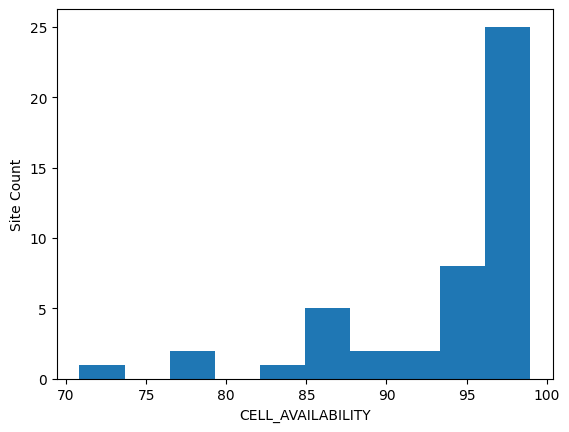

In [ ]:
df_Low_Avail = df_MBU_BRW[df_MBU_BRW["CELL_AVAILABILITY"] < 99]
df_Low_Avail_ZTE = df_Low_Avail[df_Low_Avail["VENDOR"] == "ZTE"]
df_Low_Avail_ZTE["CELL_AVAILABILITY"].describe()
df_Low_Avail_ZTE.sort_values(by=["CELL_AVAILABILITY"], ascending=True, normalize=True)
plt.hist(df_Low_Avail_ZTE["CELL_AVAILABILITY"])
plt.xlabel("CELL_AVAILABILITY")
plt.ylabel("Site Count")
plt.show()

## Filter Huawei degraded data

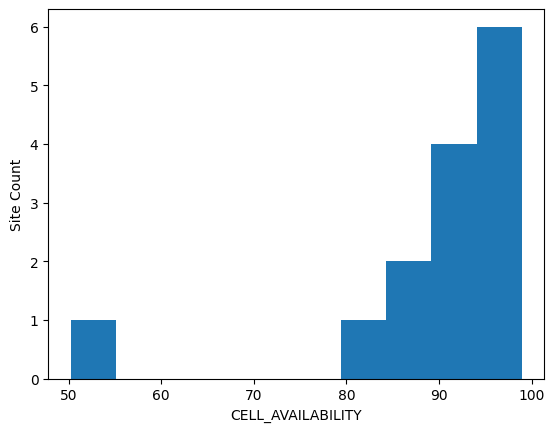

In [ ]:
df_Low_Avail = df_MBU_BRW[df_MBU_BRW["CELL_AVAILABILITY"] < 99]
df_Low_Avail_HUW = df_Low_Avail[df_Low_Avail["VENDOR"] == "HUW"]
plt.hist(df_Low_Avail_HUW["CELL_AVAILABILITY"])
plt.xlabel("CELL_AVAILABILITY")
plt.ylabel("Site Count")
plt.show()   
df.cummax()


In [39]:
# get proportion of sites with low availability
df_Low_Avail = df_MBU_BRW[df_MBU_BRW["CELL_AVAILABILITY"] < 99]
df_Low_Avail_HUW = df_Low_Avail[df_Low_Avail["VENDOR"] == "HUW"]
df_Low_Avail_HUW["CELL_AVAILABILITY"].describe()


count    14.000000
mean     89.623636
std      12.414503
min      50.234053
25%      88.808835
50%      93.133359
75%      96.875965
max      98.904321
Name: CELL_AVAILABILITY, dtype: float64

## Groupby Summary Data 

In [44]:
#Groupby data 
pd.set_option("display.max_rows", None)
df.groupby(["MKT_REGION","MBU"])["CELL_AVAILABILITY"].agg(["mean","max","min"])

mean    max        min
MKT_REGION MBU                                   
C1         C1-LHR-01  98.914027  100.0  71.947338
           C1-LHR-02  99.367071  100.0  46.400463
           C1-LHR-03  99.410424  100.0  67.527006
           C1-LHR-04  99.274493  100.0  67.427662
           C1-LHR-05  98.799476  100.0  74.311343
           C1-LHR-06  99.554141  100.0  74.846644
           C1-LHR-07  99.268570  100.0  77.182999
           C1-LHR-08  99.727883  100.0  57.563657
C2         C2-KSR-03  98.473473  100.0  41.519097
           C2-MKR-02  97.752168  100.0  16.192130
           C2-NNK-05  98.429991  100.0  48.134645
           C2-RWD-01  98.030121  100.0   0.000000
           C2-SKP-04  98.558961  100.0  60.416667
C3         C3-BWN-04  99.676362  100.0  73.536908
           C3-HSP-05  99.703336  100.0  64.024450
           C3-OKA-03  98.692789  100.0  36.828704
           C3-PKT-02  99.616507  100.0  57.074219
           C3-SWL-01  99.495508  100.0  52.213542
C4         C4-GRT-04  99.611042  100.0  74.838606
           C4-GUJ-01  99.379210  100.0  64.220679
           C4-GUJ-02  99.763067  100.0  75.313143
           C4-HFZ-06  99.110521  100.0  20.633198
           C4-MBD-08  99.556998  100.0  81.086677
           C4-NRW-05  99.378478  100.0  68.284144
           C4-SKT-03  99.665093  100.0  84.473380
           C4-WZD-07  99.807084  100.0  85.267168
C5         C5-BHL-09  99.501766  100.0  35.236626
           C5-FSD-01  98.804944  100.0   4.412809
           C5-FSD-02  99.004468  100.0  37.452836
           C5-FSD-03  99.102169  100.0  70.067708
           C5-FSD-04  99.077242  100.0  55.395576
           C5-FSD-05  98.961674  100.0  57.765303
           C5-JHG-06  99.583803  100.0  68.751157
           C5-SGD-08  99.527306  100.0  60.542953
           C5-TTS-07  99.277683  100.0  73.052083
C6         C6-BKR-05  99.629348  100.0  84.186343
           C6-BRW-02  99.418180  100.0  50.234053
           C6-KWL-01  99.090347  100.0  37.995756
           C6-LAY-04  98.837672  100.0  54.016348
           C6-MUL-06  99.301897  100.0  64.877122
           C6-MUL-07  99.693058  100.0  51.109182
           C6-MUL-08  99.568089  100.0  60.097994
           C6-VHR-03  99.730728  100.0  78.978009
C7         C7-APR-01  99.220077  100.0  73.696277
           C7-BWP-03  99.665362  100.0  74.929398
           C7-BWP-04  98.977732  100.0  56.316744
           C7-DGK-05  98.962756  100.0  21.681713
           C7-KNP-06  98.621775  100.0  57.291667
           C7-LOD-02  99.116313  100.0  67.445216
           C7-RYK-07  98.639483  100.0  66.459877
N1         N1-CHK-07  99.690934  100.0  79.357639
           N1-ISB-04  99.210354  100.0  46.427951
           N1-ISB-05  99.733461  100.0  60.057870
           N1-KHU-08  98.491150  100.0  44.753729
           N1-MNW-06  98.842488  100.0  37.860790
           N1-RWP-01  99.368523  100.0  26.872106
           N1-RWP-02  99.301478  100.0  78.775559
           N1-RWP-03  98.247693  100.0   0.000000
           N1-TLG-09  99.666204  100.0  89.013310
N2         N2-DIK-07  90.217305  100.0  13.550347
           N2-DIR-06  97.524743  100.0  31.261574
           N2-KHT-05  94.490248  100.0   0.000000
           N2-MRD-03  97.542166  100.0  45.393519
           N2-NWA-09  93.737520  100.0   5.425026
           N2-NWS-04  95.611768  100.0   6.587577
           N2-PSH-01  96.826951  100.0  29.926055
           N2-PSH-02  96.244151  100.0  24.171811
           N2-TMG-08  97.328162  100.0  36.775656
N3         N3-ABT-03  98.544871  100.0   7.216435
           N3-GLT-04  98.232303  100.0  58.382523
           N3-HRP-06  98.886028  100.0  40.391107
           N3-JLM-08  99.624318  100.0  69.615484
           N3-MGO-05  98.939074  100.0  56.377315
           N3-MRP-01  99.818788  100.0  90.731096
           N3-MZR-02  98.940778  100.0  79.257330
           N3-TXA-07  98.858713  100.0  61.811825
S1         S1-DHA-06  99.831757  100.0  78.597608
           S1-GBT-04  99.277758  100.0  24.337706
           S1-GIT-02  99.41